In [1]:
import pandas as pd
import time
import numpy as np

In [3]:
data=pd.read_csv('encoded activities.csv',sep=';')

In [5]:
len(data['Case ID'].unique())

31411

In [14]:
from sklearn.preprocessing import LabelEncoder
data_sklearn = data.copy()
lb_make = LabelEncoder()
data_sklearn['Activity'] = lb_make.fit_transform(data['Activity'])

data_sklearn.head() #Results in appending a new column to df

,Unnamed: 0,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,(case) ApplicationType,(case) LoanGoal,...,OfferID,OfferedAmount,Selected,lifecycle:transition,D_seconds,milli_seconds,days,Transition,outcome,lbl
0,0,Application_652823628,4,User_1,2016/01/01 10:51:15.304,2016/01/01 10:51:15.304,Variant 2,2,New credit,Existing loan takeover,...,NaN,NaN,NaN,complete,0,0,0,0,0,A_Pending
1,1,Application_652823628,8,User_1,2016/01/01 10:51:15.352,2016/01/01 10:51:15.352,Variant 2,2,New credit,Existing loan takeover,...,NaN,NaN,NaN,complete,0,0,0,48000,0,A_Pending
2,2,Application_652823628,3,User_1,2016/01/01 10:52:36.413,2016/01/01 10:52:36.413,Variant 2,2,New credit,Existing loan takeover,...,NaN,NaN,NaN,complete,0,0,0,61000,0,A_Pending
3,3,Application_652823628,21,User_17,2016/01/02 11:45:22.429,2016/01/02 11:45:22.429,Variant 2,2,New credit,Existing loan takeover,...,NaN,NaN,NaN,start,0,0,0,16000,0,A_Pending
4,4,Application_652823628,0,User_52,2016/01/02 12:23:04.299,2016/01/02 12:23:04.299,Variant 2,2,New credit,Existing loan takeover,...,NaN,NaN,NaN,complete,0,0,0,870000,0,A_Pending


In [15]:
lb_make.classes_

array(['A_Accepted', 'A_Cancelled', 'A_Complete', 'A_Concept',
       'A_Create Application', 'A_Denied', 'A_Incomplete', 'A_Pending',
       'A_Submitted', 'A_Validating', 'O_Accepted', 'O_Cancelled',
       'O_Create Offer', 'O_Created', 'O_Refused', 'O_Returned',
       'O_Sent (mail and online)', 'O_Sent (online only)',
       'W_Assess potential fraud', 'W_Call after offers',
       'W_Call incomplete files', 'W_Complete application',
       'W_Handle leads', 'W_Personal Loan collection',
       'W_Shortened completion', 'W_Validate application'], dtype=object)

In [16]:
data_sklearn.to_csv('encoded activities.csv',sep=';',index=False)

In [6]:
event_log=data.drop(['Unnamed: 0','Unnamed: 0.1', 'Resource', 'Start Timestamp','Variant', 'Variant index',
       '(case) ApplicationType', '(case) LoanGoal', '(case) RequestedAmount',
       'Accepted', 'Action', 'CreditScore', 'EventID', 'EventOrigin',
       'FirstWithdrawalAmount', 'MonthlyCost', 'NumberOfTerms', 'OfferID',
       'OfferedAmount', 'Selected', 'lifecycle:transition', 'D_seconds',
       'milli_seconds', 'days', 'Transition', 'outcome', 'lbl'],axis=1)

In [14]:
event_log.to_csv('complete_event_log.csv',index=False)

In [3]:
EL=pd.read_csv('complete_event_log.csv')

In [2]:
EL=pd.read_csv('complete_event_log.csv')

In [3]:
EL.head()

,Case ID,Activity,Complete Timestamp
0,Application_652823628,4,2016/01/01 10:51:15.304
1,Application_652823628,8,2016/01/01 10:51:15.352
2,Application_652823628,3,2016/01/01 10:52:36.413
3,Application_652823628,21,2016/01/02 11:45:22.429
4,Application_652823628,0,2016/01/02 12:23:04.299


In [4]:
np.random.seed(22)
sample_cases = np.random.choice(EL['Case ID'].unique(), 100)

In [5]:
data_trim=(EL[EL['Case ID'].isin(sample_cases)])

In [6]:
data_trim.to_csv('../data/event_log.csv',index=False)

In [7]:
import train

Using TensorFlow backend.


divisor: 109723.8475877193
divisor2: 819172.7637061403
total chars: 25, target chars: 26
{0: '¡', 1: '¢', 2: '£', 3: '¤', 4: '¥', 5: '¦', 6: '§', 7: '¨', 8: '©', 9: 'ª', 10: '«', 11: '¬', 12: '\xad', 13: '®', 14: '¯', 15: '°', 16: '±', 17: '²', 18: '³', 19: '´', 20: 'µ', 21: '¶', 22: '·', 23: '¹', 24: 'º'}
nb sequences: 1176
Vectorization...
num features: 30
Build model...
Train on 940 samples, validate on 236 samples
Epoch 1/20
 - 8s - loss: 4.4978 - act_output_loss: 2.8247 - time_output_loss: 1.6731 - val_loss: 4.6486 - val_act_output_loss: 2.9732 - val_time_output_loss: 1.6754
Epoch 2/20
 - 3s - loss: 3.5546 - act_output_loss: 2.1871 - time_output_loss: 1.3675 - val_loss: 4.3061 - val_act_output_loss: 2.7261 - val_time_output_loss: 1.5800
Epoch 3/20
 - 3s - loss: 3.2307 - act_output_loss: 1.9306 - time_output_loss: 1.3000 - val_loss: 4.1199 - val_act_output_loss: 2.5698 - val_time_output_loss: 1.5501
Epoch 4/20
 - 3s - loss: 2.8913 - act_output_loss: 1.6542 - time_output_loss: 1.237

In [8]:
import evaluate_suffix_and_remaining_time

divisor: 109723.8475877193
divisor2: 819172.7637061403
divisor3: 1277784.6223793235
total chars: 25, target chars: 26
{0: '¡', 1: '¢', 2: '£', 3: '¤', 4: '¥', 5: '¦', 6: '§', 7: '¨', 8: '©', 9: 'ª', 10: '«', 11: '¬', 12: '\xad', 13: '®', 14: '¯', 15: '°', 16: '±', 17: '²', 18: '³', 19: '´', 20: 'µ', 21: '¶', 22: '·', 23: '¹', 24: 'º'}
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [9]:
import evaluate_next_activity_and_time

divisor: 109723.8475877193
divisor2: 819172.7637061403
total chars: 25, target chars: 26
{0: '¡', 1: '¢', 2: '£', 3: '¤', 4: '¥', 5: '¦', 6: '§', 7: '¨', 8: '©', 9: 'ª', 10: '«', 11: '¬', 12: '\xad', 13: '®', 14: '¯', 15: '°', 16: '±', 17: '²', 18: '³', 19: '´', 20: 'µ', 21: '¶', 22: '·', 23: '¹', 24: 'º'}
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
! predicted, end case
! predicted, end case
19
20
21
22
23
! predicted, end case
24
! predicted, end case
! predicted, end case
25
! predicted, end case
! predicted, end case
26
! predicted, end case
! predicted, end case
27
28
29
! predicted, end case
30
31


In [10]:
import calculate_accuracy_on_next_event

Application_1394633662: 0.7931034482758621
Application_1572640461: 0.7058823529411765
Application_1065388275: 0.7916666666666666
Application_1965608734: 0.9
Application_336250197: 0.8260869565217391
Application_275122815: 0.9333333333333333
Application_1522272001: 0.7857142857142857
Application_991440803: 0.9090909090909091
Application_1863192115: 0.9166666666666666
Application_54902350: 0.8947368421052632
Application_2029271670: 0.7857142857142857
Application_432545630: 0.8
Application_944872559: 1.0
Application_97494529: 0.875
Application_617539010: 0.9375
Application_313335774: 0.7692307692307693
Application_1953761964: 0.6428571428571429
Application_1035739361: 1.0
Application_810658733: 0.9047619047619048
Application_2041978198: 0.7894736842105263
Application_1509292111: 0.8888888888888888
Application_690024942: 0.9285714285714286
Application_890075702: 0.9411764705882353
Application_1028335742: 0.7647058823529411
Application_81196974: 0.7666666666666667
Application_1703568228: 0.

# ==================Recommendation system techniques========

### 4.1 Generate similarity matrix

In [30]:
### 4.1 Generate similarity matrixsimilarities=np.zeros((numberOfUsers,numberOfUsers))

In [31]:
start = time.time()

for i in range(numberOfUsers) :
    clear_output(wait=True)
    print("Calculating similarities for : ",i, end='\r')
    
    for j in range(numberOfUsers) :
        if j>i: #Only generate the lower triangular values
            break
        elif i==j:
            similarities[i,j]=1
        else :
            similarities[i,j]=cosineSimilarity(globalDatasetCloudModels[i,:],globalDatasetCloudModels[j,:])

end = time.time()
print("Elapsed time : ",end - start)

Elapsed time :  129.4014558792114399


#### Dump similarity matrix for further (quick) re-use

Dump the matrix

In [35]:
# with open('ExperimentsValues/Clustering/SimilarityMatrix_500.pkl', 'wb') as fp : # wb for "write bytes"
#     pickle.dump(similarities, fp)

Load the matrix

In [65]:
# with open ('SimilarityMatrix_1000.pkl', 'rb') as fp:
#     similarities = pickle.load(fp)

### 4.2 Initialize the clustering algorithm

In [50]:
nL=0 #number of cluster at iteration l
CCS=[] #List of Medoids
clusterList=np.zeros((numberOfUsers,)) #List of cluster assignation
sumOfSim=np.zeros((numberOfUsers,)) #Sum of similarities columns
rL_history=[] #History of RL ratio
ratioNL_history=[] #History of NL ratio
gammaL_history=[] #History of GammaL ratio
sumRLNL=[] #History of rL+NL

In [51]:
#Calculate sum of similarities for each column | Once calculated, it doesn't change and is, thus, re-usable
for i in range(numberOfUsers) :
    tempSum=np.sum(similarities[:,i])
    sumOfSim[i]=tempSum

In [55]:
#Get the most similar and least similar object to others (=> First two medoids)
maxOfSumSim=np.amax(sumOfSim)
indexMax=np.argmax(sumOfSim)
minOfSumSim=np.amin(sumOfSim)
indexMin=np.argmin(sumOfSim)

for i in range(numberOfUsers): #Firstly, we only assign all the items to the medoids with the highest sum of similarities with others (Genesis cluster)
    clusterList[i]=indexMax

nL+=1 #Add one to n° of cluster cause there's one global cluster (but add nothing to CCS as this first assignement is only to compute Gamma0) and assign everyone to genesis cluster (the one with the biggest SumOfSim)

gamma0=maxOfSumSim #For stop condition used later

#Compute system ratios for the genesis cluster
#tempRatioRL=calculateSimilarityRatioRL(clusterList=clusterList,gamma0=gamma0,similarities=similarities)
tempRatioRL=calculateSimilarityRatioRL(clusterList=clusterList,gamma0=gamma0,similarities=similarities)
rL_history.append(tempRatioRL)
tempRatioNL=nL/numberOfUsers
ratioNL_history.append(tempRatioNL)
tempGammaL=calculateGammaL(clusterList=clusterList,similarities=similarities)
gammaL_history.append(tempGammaL)
tempSumRLNL=tempRatioRL+tempRatioNL
sumRLNL.append(tempSumRLNL)

print("Genesis RL :",tempRatioRL,"| Genesis Ratio NL :",tempRatioNL,"| Genesis RL + Ratio NL :",tempSumRLNL,"| Genesis GammaL (=Gamma0) :",tempGammaL)
print("Max in",indexMax,":",maxOfSumSim,"| Min in",indexMin,":",minOfSumSim," | Gamma0 is :",gamma0)

#Add the two medoids to initizialize the bissecting process
CCS.append(indexMax)
CCS.append(indexMin)
nL+=1 #Only increase by one because we have delete the genesis cluster and add two new cluster => 1-1+2=2

Genesis RL : 1.0 | Genesis Ratio NL : 0.0002 | Genesis RL + Ratio NL : 1.0002 | Genesis GammaL (=Gamma0) : 1272.55941784
Max in 576 : 1272.55941784 | Min in 1032 : 397.914868234  | Gamma0 is : 1272.55941784


In [56]:
#Assign every object to the good cluster
for i in range(numberOfUsers):
    similarityWithMax=similarities[i,indexMax]
    similarityWithMin=similarities[i,indexMin]

    if similarityWithMax>similarityWithMin:
        clusterList[i]=indexMax
    else:
        clusterList[i]=indexMin

In [57]:
#Compute system ratios 
tempRatioRL=calculateSimilarityRatioRL(clusterList=clusterList,gamma0=gamma0,similarities=similarities)
rL_history.append(tempRatioRL)
tempRatioNL=nL/numberOfUsers
ratioNL_history.append(tempRatioNL)
tempGammaL=calculateGammaL(clusterList=clusterList,similarities=similarities)
gammaL_history.append(tempGammaL)
tempSumRLNL=tempRatioRL+tempRatioNL
sumRLNL.append(tempSumRLNL)

print("First2 clusters RL :",tempRatioRL,"| First2 clusters Ratio NL :",tempRatioNL,"| First2 clusters RL + Ratio NL :",tempSumRLNL,"| First2 clusters GammaL (=Gamma0) :",tempGammaL)

First2 clusters RL : 0.938073194117 | First2 clusters Ratio NL : 0.0004 | First2 clusters RL + Ratio NL : 0.938473194117 | First2 clusters GammaL (=Gamma0) : 678.283648772


In [58]:
print("Current clustering state :")
clusters, countsClusters=np.unique(clusterList, return_counts=True)
print("Clusters :",clusters)
print("Counts :",countsClusters)

Current clustering state :
Clusters : [  576.  1032.]
Counts : [4851  149]


### 4.3 Looping the algorithm until convergence

In [59]:
debug=False
numberOfClusterStop=len(clusterList) #Cluster number simple condition 

In [60]:
isOver=False
oldCCS=[]
oldClusterlist=[]
while(isOver==False):
    
    if(debug==False):
        clear_output(wait=True)
        print("Current clustering state - nL :",nL, end='\r')
    
    if(debug==True):
        print("")
        print("-----------------------------------")
        print("nL is :",nL)
        print("Current clustering state :")
        clusters, countsClusters=np.unique(clusterList, return_counts=True)
        print("Clusters :",clusters)
        print("Counts :",countsClusters)
        print("")
        
    oldCCS=[]
    oldClusterlist=[]
    oldCCS.extend(CCS)
    oldClusterlist.extend(clusterList)
    
    #Calculate Avg similarity for each cluster
    clusterAvgSimiliraty={}
    for i in CCS :
        clusterAvgSimiliraty[i]=calculateClusterAvgSimilarity(clusterList=clusterList,clusterMedoidID=i,similarities=similarities)   
    
    #Detect the "weakest" cluster, delete it, and assign NaN to items that were in it
    weakestCluster=min(clusterAvgSimiliraty, key=clusterAvgSimiliraty.get)
    
    if(debug==True):
        print("Average similarities :",clusterAvgSimiliraty)
        print("Weakest medoid is :",weakestCluster)
        print("")
        
    CCS.remove(weakestCluster)
    
    #All the undefined cluster items are potential medoid candidates
    newMedoidsCandidates=[]
    
    #Set the cluster assignation to NaN and append the element to medoid candidates array
    for index,i in enumerate(clusterList) :
        if(i==weakestCluster):
            newMedoidsCandidates.append(index)
    
    if(debug==True):
        print("New medoid candidates are  :",newMedoidsCandidates)
    
    #Retrieve candidates sum of similarities
    candidatesSumOfSim=[]
    
    for i in newMedoidsCandidates:
        candidatesSumOfSim.append(sumOfSim[i])
    
    #Detect min and max of sum of similiraties (=> The two new medoids)
    maxSimSumCandidate=np.amax(candidatesSumOfSim)
    inArrayMaxSimSumCandidate=np.argmax(candidatesSumOfSim)
    indexMaxSimSumCandidate=newMedoidsCandidates[inArrayMaxSimSumCandidate]
    
    minSimSumCandidate=np.amin(candidatesSumOfSim)
    inArrayMinSimSumCandidate=np.argmin(candidatesSumOfSim)
    indexMinSimSumCandidate=newMedoidsCandidates[inArrayMinSimSumCandidate]
    
    if(debug==True):
        print("Strongest medoid candidate is :",indexMaxSimSumCandidate,"| Weakest medoid candidate is :",indexMinSimSumCandidate)
    
    #Add the two medoids to medoids array and increase nl (one delete, two added => +1)
    CCS.append(indexMaxSimSumCandidate)
    CCS.append(indexMinSimSumCandidate)
    nL+=1
    
    #Reassign all the items to the most similar medoid (Alternative version of bissecting algorithm with full reassignement, Steinbach and al. 2000)
    for count,i in enumerate(clusterList):
        pointSimilarityWithCenters={}
        for j in CCS:
            pointSimilarityWithCenters[j]=similarities[count,j]
        closestCluster=max(pointSimilarityWithCenters, key=pointSimilarityWithCenters.get)
        clusterList[count]=closestCluster  
        
    #Compute system ratios 
    #tempRatioRL=calculateSimilarityRatioRL(clusterList=clusterList,gamma0=gamma0,similarities=similarities)
    tempRatioRL=calculateSimilarityRatioRL(clusterList=clusterList,gamma0=gamma0,similarities=similarities)
    rL_history.append(tempRatioRL)
    tempRatioNL=nL/numberOfUsers
    ratioNL_history.append(tempRatioNL)
    tempGammaL=calculateGammaL(clusterList=clusterList,similarities=similarities)
    gammaL_history.append(tempGammaL)
    tempSumRLNL=tempRatioRL+tempRatioNL
    sumRLNL.append(tempSumRLNL)
    
    if(debug==True):
        print("")
        print("RL :",tempRatioRL,"| Ratio NL :",tempRatioNL,"| GammaL :",tempGammaL,"| RL+Ratio NL :",tempSumRLNL)

    #Check the stop conditions
    
    #Cluster number simple condition 
    if (nL==numberOfClusterStop):
        isOver=True
        
#     if(nL>3):
        
#         if(tempSumRLNL>sumRLNL[-2]):
#             isOver=True
#             clear_output(wait=True)
#             print("---------------------------------------------------------------")
#             print("Algorithm over (RL+NL criterion) with",(nL-1),"clusters")
#             print("Final clustering is :")
#             finalClusters, countsFinalClusters=np.unique(oldClusterlist, return_counts=True)
#             print("")
#             print("Clusters medoids are :")
#             print(finalClusters)
#             print("")
#             print("Associated clusters sizes are :")
#             print(countsFinalClusters)
            
#         elif(tempGammaL>gammaL_history[-2]):
#             isOver=True
#             clear_output(wait=True)
#             print("---------------------------------------------------------------")
#             print("Algorithm over (GammaL criterion) with",(nL-1),"clusters")
#             print("Final clustering is :")
#             finalClusters, countsFinalClusters=np.unique(oldClusterlist, return_counts=True)
#             print("")
#             print("Clusters medoids are :")
#             print(finalClusters)
#             print("")
#             print("Associated clusters sizes are :")

KeyboardInterrupt: 

## 5.  Euclidean distance implementation

### 5.1 Define Euclidean distance specific functions

All the other functions are based on the *similarities* matrix which is composed of similarity measures. We just need to change the way the matrix is generated in order to compare similarity measures. We also need to redefine $r_{l}$ as cosine similarities and Euclidean distances are evolving in opposite directions

In [52]:
#This function computes distance between two users based on their cloud models
#It returns a float that is the distance
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [53]:
distUiUj=dist(ui_simple,uj_simple)
print("Euclidean distance between user i and User j is",distUiUj)

Euclidean distance between user i and User j is 0.101381294039


$$r_l=\dfrac{\sum_{k}^{N_l}\sum_{i=0}^{m_k}S(i,CC_k)}{\sum_{i=0}^{N}S(i,CC_0)}$$

<center>Where $m_{k}$ is the number of users assigned to the cluster $k$, $N_{l}$ is the current number of clusters, $CC_{k}$ is the cluster $k$ medoid, $N$ is the number of users, $CC_{0}$ is the first medoid</center>

$r_{l}$ is the ratio between the sum of the current clusters average intra-similarities and the original cluster average intra-similarity $\rightarrow$ Indicate how we are increasing/decreasing the intra-similarity in our system in comparasion with the original state

In [54]:
#This function computes RL ratio defined above
#It returns a float

#N_l = number of cluster at iteration l
#N = total number of users
#m_k = number of users in cluster k
#S(i,j) = similarity between i and j
#CC_k = n° k cluster center/medoid 


# clusterMedoidID = int : ID of the medoid of the cluster
# gamma0 = float : Sum of distances between objects cluster medoid at the origin
# similarities = array : Distance matrix
def calculateSimilarityRatioRLDistance(clusterList,similarities,gamma0):
    clusters, counts=np.unique(clusterList, return_counts=True)
    systemSimilaritySum=0
    for i in clusters :
        systemSimilaritySum+=calculateClusterSimilaritySumWithCenter(i,clusterList,similarities)
        
    similarityRatioRL=systemSimilaritySum/gamma0
    return similarityRatioRL

### 5.2 Generate distance matrix

In [55]:
distances=np.zeros((numberOfUsers,numberOfUsers))

In [56]:
start = time.time()

for i in range(numberOfUsers) :
    clear_output(wait=True)
    print("Calculating distances for : ",i, end='\r')
    
    for j in range(numberOfUsers) :
        if j>i: #Only generate the lower triangular values
            break
        elif i==j:
            distances[i,j]=0
        else :
            distances[i,j]=dist(globalDatasetCloudModels[i,:],globalDatasetCloudModels[j,:])

end = time.time()
print("Elapsed time : ",end - start)

Elapsed time :  173.63789558410645


In [57]:
#Symmetrize the matrix as we only computed the lower triangular values
distances=symmetrize(distances)

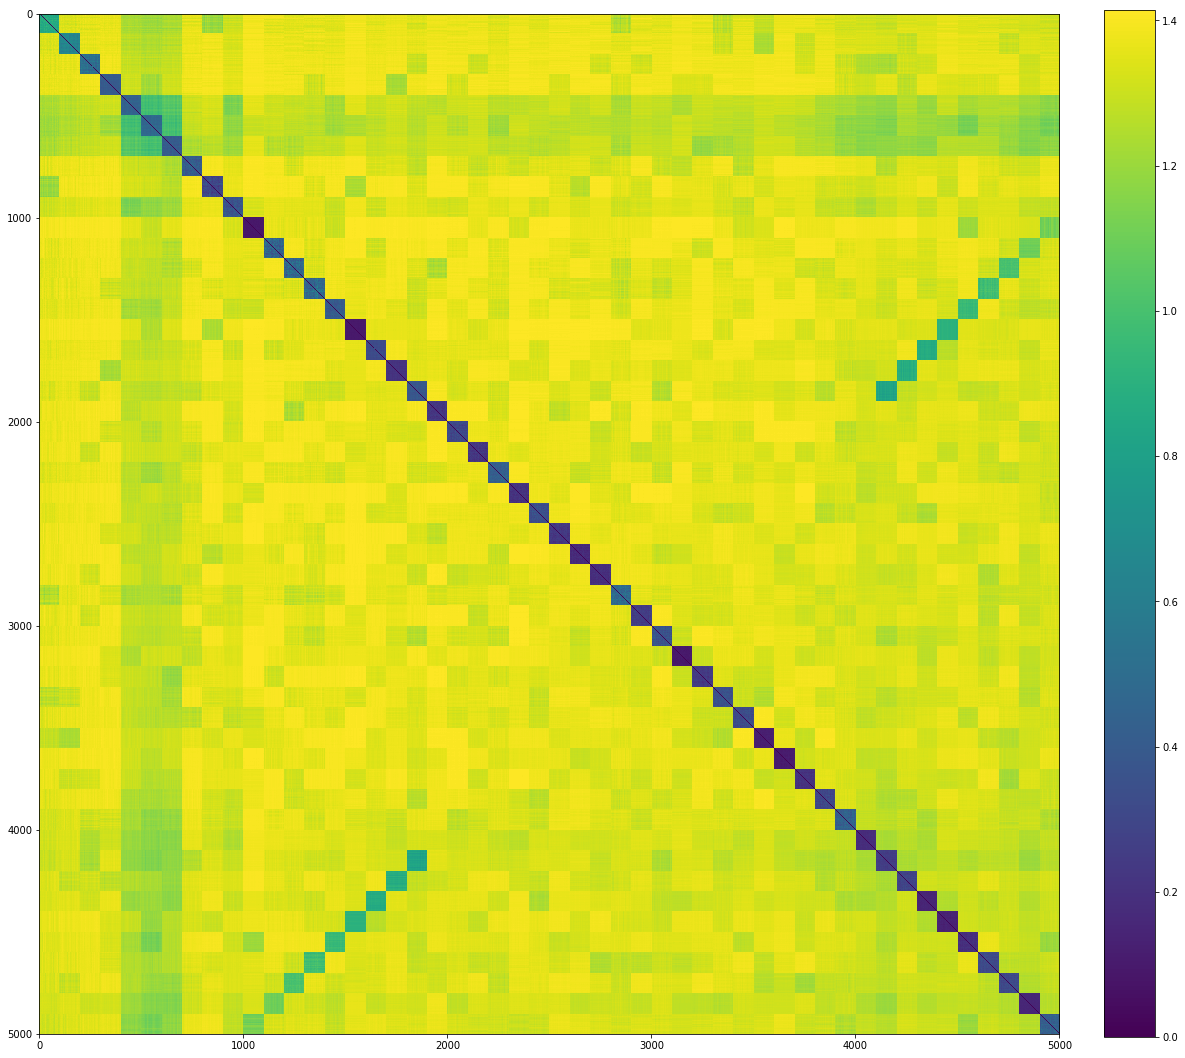

In [58]:
plt.figure(1, figsize=(20,20))
heatmap=plt.imshow(distances, cmap='viridis', interpolation='nearest')
plt.colorbar(heatmap,fraction=0.046, pad=0.04)
plt.show()

### 5.3 Initialize the clustering algorithm

In [59]:
nL_distances=0 #number of cluster at iteration l
CCS_distances=[] #List of Medoids
clusterList_distances=np.zeros((numberOfUsers,)) #List of cluster assignation
sumOfDistances=np.zeros((numberOfUsers,)) #Sum of similarities columns
rL_history_distances=[] #History of RL ratio
ratioNL_history_distances=[] #History of NL ratio
gammaL_history_distances=[] #History of GammaL ratio
sumRLNL_distances=[] #History of rL+NL

In [60]:
#Calculate sum of distances for each column | Once calculated, it doesn't change and is, thus, re-usable
for i in range(numberOfUsers) :
    tempSum=np.sum(distances[:,i])
    sumOfDistances[i]=tempSum

In [63]:
#Get the most similar and least similar object to others (=> First two medoids)
maxOfSumDis=np.amax(sumOfDistances)
indexMax=np.argmax(sumOfDistances)
minOfSumDis=np.amin(sumOfDistances)
indexMin=np.argmin(sumOfDistances)

for i in range(numberOfUsers): #Firstly, we only assign all the items to the medoids with the smallest sum of distances with others (Genesis cluster)
    clusterList_distances[i]=indexMin

nL_distances+=1 #Add one to n° of cluster cause there's one global cluster (but add nothing to CCS as this first assignement is only to compute Gamma0) and assign everyone to genesis cluster (the one with the biggest SumOfDis)

gamma0=minOfSumDis #For stop condition used later

#Compute system ratios for the genesis cluster
#tempRatioRL=calculateSimilarityRatioRL(clusterList=clusterList,gamma0=gamma0,similarities=similarities)
tempRatioRL=calculateSimilarityRatioRLDistance(clusterList=clusterList_distances,gamma0=gamma0,similarities=distances)
rL_history_distances.append(tempRatioRL)
tempRatioNL=nL_distances/numberOfUsers
ratioNL_history_distances.append(tempRatioNL)
tempGammaL=calculateGammaL(clusterList=clusterList_distances,similarities=distances)
gammaL_history_distances.append(tempGammaL)
tempSumRLNL=tempRatioRL+tempRatioNL
sumRLNL_distances.append(tempSumRLNL)

print("Genesis RL :",tempRatioRL,"| Genesis Ratio NL :",tempRatioNL,"| Genesis RL + Ratio NL :",tempSumRLNL,"| Genesis GammaL (=Gamma0) :",tempGammaL)
print("Max in",indexMax,":",maxOfSumDis,"| Min in",indexMin,":",minOfSumDis," | Gamma0 is :",gamma0)

#Add the two medoids to initizialize the bissecting process
CCS_distances.append(indexMax)
CCS_distances.append(indexMin)
nL_distances+=1 #Only increase by one because we have delete the genesis cluster and add two new cluster => 1-1+2=2

Genesis RL : 1.0 | Genesis Ratio NL : 0.0002 | Genesis RL + Ratio NL : 1.0002 | Genesis GammaL (=Gamma0) : 6069.94470012
Max in 1131 : 6748.41258964 | Min in 576 : 6069.94470012  | Gamma0 is : 6069.94470012


In [64]:
#Assign every object to the good cluster
for i in range(numberOfUsers):
    similarityWithMax=distances[i,indexMax]
    similarityWithMin=distances[i,indexMin]

    if similarityWithMax<similarityWithMin:
        clusterList_distances[i]=indexMax
    else:
        clusterList_distances[i]=indexMin

In [65]:
#Compute system ratios 
tempRatioRL=calculateSimilarityRatioRLDistance(clusterList=clusterList_distances,gamma0=gamma0,similarities=distances)
rL_history_distances.append(tempRatioRL)
tempRatioNL=nL_distances/numberOfUsers
ratioNL_history_distances.append(tempRatioNL)
tempGammaL=calculateGammaL(clusterList=clusterList_distances,similarities=distances)
gammaL_history_distances.append(tempGammaL)
tempSumRLNL=tempRatioRL+tempRatioNL
sumRLNL_distances.append(tempSumRLNL)

print("First2 clusters RL :",tempRatioRL,"| First2 clusters Ratio NL :",tempRatioNL,"| First2 clusters RL + Ratio NL :",tempSumRLNL,"| First2 clusters GammaL (=Gamma0) :",tempGammaL)

First2 clusters RL : 0.988170962197 | First2 clusters Ratio NL : 0.0004 | First2 clusters RL + Ratio NL : 0.988570962197 | First2 clusters GammaL (=Gamma0) : 2999.0715474


In [66]:
print("Current clustering state :")
clusters, countsClusters=np.unique(clusterList_distances, return_counts=True)
print("Clusters :",clusters)
print("Counts :",countsClusters)

Current clustering state :
Clusters : [  576.  1131.]
Counts : [4898  102]


### 5.4 Looping the algorithm until convergence

In [67]:
debug=False
numberOfClusterStop_distances=len(clusterList_distances) #Cluster number simple condition 

In [68]:
isOver=False
oldCCS_distances=[]
oldClusterlist_distances=[]
while(isOver==False):
    
    if(debug==False):
        clear_output(wait=True)
        print("Current clustering state - nL :",nL_distances, end='\r')
    
    if(debug==True):
        print("")
        print("-----------------------------------")
        print("nL is :",nL_distances)
        print("Current clustering state :")
        clusters, countsClusters=np.unique(clusterList_distances, return_counts=True)
        print("Clusters :",clusters)
        print("Counts :",countsClusters)
        print("")
        
    oldCCS_distances=[]
    oldClusterlist_distances=[]
    oldCCS_distances.extend(CCS_distances)
    oldClusterlist_distances.extend(clusterList_distances)
    
    #Calculate Avg similarity for each cluster
    clusterAvgSimiliraty={}
    for i in CCS_distances :
        clusterAvgSimiliraty[i]=calculateClusterAvgSimilarity(clusterList=clusterList_distances,clusterMedoidID=i,similarities=distances)   
    
    #Detect the "weakest" cluster, delete it, and assign NaN to items that were in it
    weakestCluster=max(clusterAvgSimiliraty, key=clusterAvgSimiliraty.get)
    
    if(debug==True):
        print("Average distances :",clusterAvgSimiliraty)
        print("Weakest medoid is :",weakestCluster)
        print("")
        
    CCS_distances.remove(weakestCluster)
    
    #All the undefined cluster items are potential medoid candidates
    newMedoidsCandidates=[]
    
    #Set the cluster assignation to NaN and append the element to medoid candidates array
    for index,i in enumerate(clusterList_distances) :
        if(i==weakestCluster):
            newMedoidsCandidates.append(index)
    
    if(debug==True):
        print("New medoid candidates are  :",newMedoidsCandidates)
    
    #Retrieve candidates sum of similarities
    candidatesSumOfDis=[]
    
    for i in newMedoidsCandidates:
        candidatesSumOfDis.append(sumOfDistances[i])
    
    #Detect min and max of sum of distances (=> The two new medoids)
    maxDisSumCandidate=np.amax(candidatesSumOfDis)
    inArrayMaxSimSumCandidate=np.argmax(candidatesSumOfDis)
    indexMaxSimSumCandidate=newMedoidsCandidates[inArrayMaxSimSumCandidate]
    
    minSimSumCandidate=np.amin(candidatesSumOfDis)
    inArrayMinSimSumCandidate=np.argmin(candidatesSumOfDis)
    indexMinSimSumCandidate=newMedoidsCandidates[inArrayMinSimSumCandidate]
    
    if(debug==True):
        print("Strongest medoid candidate is :",indexMaxSimSumCandidate,"| Weakest medoid candidate is :",indexMinSimSumCandidate)
    
    #Add the two medoids to medoids array and increase nl (one delete, two added => +1)
    CCS_distances.append(indexMaxSimSumCandidate)
    CCS_distances.append(indexMinSimSumCandidate)
    nL_distances+=1
    
    #Reassign all the items to the most close medoid (Alternative version of bissecting algorithm with full reassignement, Steinbach and al. 2000)
    for count,i in enumerate(clusterList_distances):
        pointDistanceWithCenters={}
        for j in CCS_distances:
            pointDistanceWithCenters[j]=distances[count,j]
        closestCluster=min(pointDistanceWithCenters, key=pointDistanceWithCenters.get)
        clusterList_distances[count]=closestCluster  
        
    #Compute system ratios 
    tempRatioRL=calculateSimilarityRatioRLDistance(clusterList=clusterList_distances,gamma0=gamma0,similarities=distances)
    rL_history_distances.append(tempRatioRL)
    tempRatioNL=nL_distances/numberOfUsers
    ratioNL_history_distances.append(tempRatioNL)
    tempGammaL=calculateGammaL(clusterList=clusterList_distances,similarities=distances)
    gammaL_history_distances.append(tempGammaL)
    tempSumRLNL=tempRatioRL+tempRatioNL
    sumRLNL_distances.append(tempSumRLNL)
    
    if(debug==True):
        print("")
        print("RL :",tempRatioRL,"| Ratio NL :",tempRatioNL,"| GammaL :",tempGammaL,"| RL+Ratio NL :",tempSumRLNL)

    
    #Check the stop conditions
    #Cluster number simple condition 
    if (nL_distances==numberOfClusterStop_distances):
        isOver=True
        
    if(nL_distances>3):
        
        if(tempSumRLNL>sumRLNL_distances[-2]):
            isOver=True
            clear_output(wait=True)
            print("Algorithm over (RL+NL criterion) with",(nL_distances-1),"clusters")
            print("Final clustering is :")
            finalClusters_distances, countsFinalClusters_distances=np.unique(oldClusterlist_distances, return_counts=True)
            print(finalClusters_distances)
            print(countsFinalClusters_distances)
            
        elif(tempGammaL>gammaL_history_distances[-2]):
            isOver=True
            clear_output(wait=True)
            print("Algorithm over (GammaL criterion) with",(nL_distances-1),"clusters")
            print("Final clustering is :")
            finalClusters_distances, countsFinalClusters_distances=np.unique(oldClusterlist_distances, return_counts=True)
            print(finalClusters_distances)
            print(countsFinalClusters_distances)

Algorithm over (RL+NL criterion) with 39 clusters
Final clustering is :
[   90.   166.   233.   347.   576.   774.   809.   933.  1066.  1131.
  1265.  1325.  1409.  1632.  1821.  1975.  2062.  2215.  2355.  2431.
  2555.  2602.  2736.  2888.  2921.  3000.  3187.  3275.  3361.  3411.
  3631.  3741.  3800.  3968.  4016.  4264.  4461.  4845.  4936.]
[100 142 100 100 300 187 100 100 100 100 200 200 200 200 200 100 100 100
 100 100 100 100 100 100 107 100 100 100 158 100 100 100 100 100 100 200
 206 100 100]


**Generate a *clusterized* cloud model matrix**

In [69]:
globalCloudModelClusterized_distances=[]

for cluster in finalClusters_distances:
    clusterizedCloudModel=[]
    for user, assignment in enumerate(oldClusterlist_distances):
        if(assignment==cluster):
            clusterizedCloudModel.append(globalDatasetCloudModels[user,:])
            
    clusterizedCloudModel=np.array(clusterizedCloudModel)
    globalCloudModelClusterized_distances.append(clusterizedCloudModel)
    
globalCloudModelClusterized_distances=np.array(globalCloudModelClusterized_distances)

**Put all the interesting objects into a single list and dump the package for further re-use**

In [70]:
finalClusteringSituation=[oldClusterlist_distances,globalDatasetCloudModels,globalCloudModelClusterized_distances]
with open('ExperimentsValues/Clustering/finalClusteringEuclideanDistance_5000.pkl', 'wb') as fp : # wb for "write bytes"
    pickle.dump(finalClusteringSituation, fp)

# -----------------------------------------------------------------------------------

### Comparison between Cosine similarity and Euclidean distance solutions

In [75]:
print("---------------------------------------------------------------")
print("Algorithm over (CosSim) with",(nL-1),"clusters")
print("Final clustering is :")
finalClusters, countsFinalClusters=np.unique(oldClusterlist, return_counts=True)
print("")
print("Clusters medoids are :")
print(finalClusters)
print("")
print("Associated clusters sizes are :")
print(countsFinalClusters)

---------------------------------------------------------------
Algorithm over (CosSim) with 38 clusters
Final clustering is :

Clusters medoids are :
[   90.   166.   233.   347.   576.   770.   809.   933.  1032.  1131.
  1265.  1325.  1409.  1632.  1821.  1975.  2036.  2155.  2215.  2356.
  2431.  2577.  2602.  2736.  2888.  2960.  3091.  3223.  3361.  3411.
  3631.  3741.  3800.  3968.  4016.  4243.  4461.  4936.]

Associated clusters sizes are :
[100 142 100 100 400 200 100 100 100 100 200 200 200 200 200 100 100 100
 100 100 100 100 100 100 100 100 100 100 158 100 100 100 100 100 100 200
 200 100]


In [76]:
print("Algorithm over (Euclidean Distance) with",(nL_distances-1),"clusters")
print("Final clustering is :")
finalClusters_distances, countsFinalClusters_distances=np.unique(oldClusterlist_distances, return_counts=True)
print(finalClusters_distances)
print(countsFinalClusters_distances)

Algorithm over (Euclidean Distance) with 39 clusters
Final clustering is :
[   90.   166.   233.   347.   576.   774.   809.   933.  1066.  1131.
  1265.  1325.  1409.  1632.  1821.  1975.  2062.  2215.  2355.  2431.
  2555.  2602.  2736.  2888.  2921.  3000.  3187.  3275.  3361.  3411.
  3631.  3741.  3800.  3968.  4016.  4264.  4461.  4845.  4936.]
[100 142 100 100 300 187 100 100 100 100 200 200 200 200 200 100 100 100
 100 100 100 100 100 100 107 100 100 100 158 100 100 100 100 100 100 200
 206 100 100]


# --------------------------------------------------------------------------------------

$$Cluster_{k}SimilaritySumWithCenter=\sum_{i=0}^{m_k}S(i,CC_k)$$
<center>Where $m_{k}$ is the number of users assigned to the cluster, $CC_{k}$ is the cluster medoid</center>

In [ ]:
#This function is the same as calculateClusterAvgSimilarity() except it doesn't average the final sum
#It returns a float

# clusterMedoidID = int : ID of the medoid of the cluster
# clusterList = list : List of clusters associations for each user (clusterList[i]=6 means that ith user is in the cluster associated to medoid 6 which is user n°6)
# similarities = array : Similarity matrix

def calculateClusterSimilaritySumWithCenter(clusterMedoidID,clusterList,similarities):
    clusters, counts=np.unique(clusterList, return_counts=True)
    clusterMembers=[]
    for count, i in enumerate(clusterList):
        if (i==clusterMedoidID):
            clusterMembers.append(count)
            
    tempSumOfSim=0
    for i in clusterMembers:
        tempSumOfSim+=similarities[i,int(clusterMedoidID)]
    
    return tempSumOfSim

In [20]:
data.head()

,Unnamed: 0,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,(case) ApplicationType,(case) LoanGoal,...,OfferID,OfferedAmount,Selected,lifecycle:transition,D_seconds,milli_seconds,days,Transition,outcome,lbl
0,0,Application_652823628,A_Create Application,User_1,2016/01/01 10:51:15.304,2016/01/01 10:51:15.304,Variant 2,2,New credit,Existing loan takeover,...,NaN,NaN,NaN,complete,0,0,0,0,0,A_Pending
1,1,Application_652823628,A_Submitted,User_1,2016/01/01 10:51:15.352,2016/01/01 10:51:15.352,Variant 2,2,New credit,Existing loan takeover,...,NaN,NaN,NaN,complete,0,0,0,48000,0,A_Pending
2,2,Application_652823628,A_Concept,User_1,2016/01/01 10:52:36.413,2016/01/01 10:52:36.413,Variant 2,2,New credit,Existing loan takeover,...,NaN,NaN,NaN,complete,0,0,0,61000,0,A_Pending
3,3,Application_652823628,W_Complete application,User_17,2016/01/02 11:45:22.429,2016/01/02 11:45:22.429,Variant 2,2,New credit,Existing loan takeover,...,NaN,NaN,NaN,start,0,0,0,16000,0,A_Pending
4,4,Application_652823628,A_Accepted,User_52,2016/01/02 12:23:04.299,2016/01/02 12:23:04.299,Variant 2,2,New credit,Existing loan takeover,...,NaN,NaN,NaN,complete,0,0,0,870000,0,A_Pending


In [ ]:
#### cos similarity fast for big data 

import numpy as np

# Example data
A = np.random.random([500000, 100])
B = np.random.random([160000, 100])

# There may be a proper numpy method for this function, but it won't be much faster.
def normalise(A):
    lengths = (A**2).sum(axis=1, keepdims=True)**.5
    return A/lengths

A = normalise(A)
B = normalise(B)

results = []

rows_in_slice = 100

slice_start = 0
slice_end = slice_start + rows_in_slice

while slice_end <= A.shape[0]:

    results.append(A[slice_start:slice_end].dot(B.T).max(axis=1))

    slice_start += rows_in_slice
    slice_end = slice_start + rows_in_slice

result = np.concatenate(results)

In [1]:
import pandas as pd
import time
import numpy as np
from ClusteringPredictiveModel import ClusteringPredictiveModel
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from  matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from LastStateEncoder import LastStateEncoder

In [2]:
data=pd.read_csv('BPIC 2017 just complete cases.csv',sep=';')

In [3]:
global case_id_col,event_col,timestamp_col,label_col,pos_label,numeric_cols,meta_event_data,other_col,variant_col

case_id_col = "Case ID"
event_col = "Activity"
timestamp_col = "Complete Timestamp"
label_col = 'lbl'
pos_label = 'A_Pending'
cat_cols = ["Activity",'Resource'] 
cat_cols2=[ '(case) LoanGoal','(case) ApplicationType']
numeric_cols = [label_col]  #'(case) RequestedAmount'
meta_event_data=['Start Timestamp','EventOrigin','OfferID','Unnamed: 0','Transition','milli_seconds',
          'EventID','lifecycle:transition','days','D_seconds',
          'Accepted', 'Selected' ,
          'FirstWithdrawalAmount', 'MonthlyCost', 'NumberOfTerms','outcome',
           'Variant', 'Action', 'CreditScore','OfferedAmount'
          ]
other_col= '(case) RequestedAmount'
variant_col='Variant index'

In [4]:
def time_variant_clustering_fit(all_traces): 
    
    global transition_average,sejourn_average
    
    transition_average=np.average(all_traces['Transition'])     #                                               issue N°2
    transition_average=transition_average.round(0)
    sejourn_average=np.average(all_traces['milli_seconds'])
    sejourn_average=sejourn_average.round(0)

    #clustering.fit_predict:
    case_s1=all_traces[all_traces ['Transition']>transition_average ]['Case ID']
    case_f1=all_traces[all_traces ['Transition']<=transition_average ]['Case ID']
    case_s2=all_traces[all_traces ['milli_seconds']>sejourn_average ]['Case ID']
    case_f2=all_traces[all_traces ['milli_seconds']<=sejourn_average ]['Case ID']

    # Disciminer les cases into 4 clusters:
    case_ss=list(set(case_s1).intersection(set(case_s2)))
    case_sf=list(set(case_s1).intersection(set(case_f2)))
    case_fs=list(set(case_f1).intersection(set(case_s2)))
    case_ff=list(set(case_f1).intersection(set(case_f2)))


    vrs_ss=list(all_traces[all_traces['Case ID'].isin(case_ss)]['Variant index'])  #vrs is not unique
    vrs_sf=list(all_traces[all_traces['Case ID'].isin(case_sf)]['Variant index'])
    vrs_fs=list(all_traces[all_traces['Case ID'].isin(case_fs)]['Variant index'])
    vrs_ff=list(all_traces[all_traces['Case ID'].isin(case_ff)]['Variant index'])

    all_var=train['Variant index'].unique()
    print(all_var[0:10])
    prop=(np.zeros(len(all_var)),np.zeros(len(all_var)),np.zeros(len(all_var)),np.zeros(len(all_var)))

    # number times for variant in each cluster it takes a while!!
    for i in range(len(all_var)):
        prop[0][i]=vrs_ss.count(all_var[i])
        prop[1][i]=vrs_sf.count(all_var[i])
        prop[2][i]=vrs_fs.count(all_var[i])
        prop[3][i]=vrs_ff.count(all_var[i])

    prop
    
    global ss1,sf1,fs1,ff1,rest1

    ss1=[]
    sf1=[]
    fs1=[]
    ff1=[]

    for i in range(len(all_var)):
        max_num=max(prop[0][i],prop[1][i],prop[2][i],prop[3][i])
        if prop[0][i]==max_num:
            ss1.append(all_var[i])
        elif prop[1][i]==max_num:
            sf1.append(all_var[i])
        elif prop[2][i]==max_num:
            fs1.append(all_var[i])
        elif prop[3][i]==max_num:
            ff1.append(all_var[i])
    print('full isolated clusters')
    print('slow slow : ',len(ss1))
    print('slow fast : ',len(sf1))
    print('fast slow : ',len(fs1))
    print('fast fast : ',len(ff1))       

    print('clean cluster from not maximal number of variant ...')

    # come back to DataFrame structure
    filtered_ss=all_traces[all_traces['Case ID'].isin(case_ss)]
    filtered_sf=all_traces[all_traces['Case ID'].isin(case_sf)]
    filtered_fs=all_traces[all_traces['Case ID'].isin(case_fs)]
    filtered_ff=all_traces[all_traces['Case ID'].isin(case_ff)]
    print('Not isolated cases')
    print('slow slow : ',len(filtered_ss))
    print('slow fast : ',len(filtered_sf))
    print('fast slow : ',len(filtered_fs))
    print('fast fast : ',len(filtered_ff))

    # clean...
    
    print('clean...')
    
    filtered_rest=filtered_ss[filtered_ss['Variant index'].isin(sf1)] #inplace=True: slow operation
    filtered_rest=pd.concat([filtered_rest,filtered_ss[filtered_ss['Variant index'].isin(fs1)]],sort=False)
    filtered_rest=pd.concat([filtered_rest,filtered_ss[filtered_ss['Variant index'].isin(ff1)]],sort=False)
    
    filtered_ss=filtered_ss.drop(filtered_ss[filtered_ss['Variant index'].isin(sf1)].index)  
    filtered_ss=filtered_ss.drop(filtered_ss[filtered_ss['Variant index'].isin(fs1)].index)
    filtered_ss=filtered_ss.drop(filtered_ss[filtered_ss['Variant index'].isin(ff1)].index)
    print(len(filtered_ss))

    filtered_rest=pd.concat([filtered_rest,filtered_sf[filtered_sf['Variant index'].isin(ss1)]],sort=False)
    filtered_rest=pd.concat([filtered_rest,filtered_sf[filtered_sf['Variant index'].isin(fs1)]],sort=False)
    filtered_rest=pd.concat([filtered_rest,filtered_sf[filtered_sf['Variant index'].isin(ff1)]],sort=False)
    
    filtered_sf=filtered_sf.drop(filtered_sf[filtered_sf['Variant index'].isin(ss1)].index)
    filtered_sf=filtered_sf.drop(filtered_sf[filtered_sf['Variant index'].isin(fs1)].index)
    filtered_sf=filtered_sf.drop(filtered_sf[filtered_sf['Variant index'].isin(ff1)].index)
    print(len(filtered_sf))

    filtered_rest=pd.concat([filtered_rest,filtered_fs[filtered_fs['Variant index'].isin(ss1)]],sort=False)
    filtered_rest=pd.concat([filtered_rest,filtered_fs[filtered_fs['Variant index'].isin(sf1)]],sort=False)
    filtered_rest=pd.concat([filtered_rest,filtered_fs[filtered_fs['Variant index'].isin(ff1)]],sort=False)
    
    filtered_fs=filtered_fs.drop(filtered_fs[filtered_fs['Variant index'].isin(ss1)].index)
    filtered_fs=filtered_fs.drop(filtered_fs[filtered_fs['Variant index'].isin(sf1)].index)
    filtered_fs=filtered_fs.drop(filtered_fs[filtered_fs['Variant index'].isin(ff1)].index)
    print(len(filtered_fs))

    filtered_rest=pd.concat([filtered_rest,filtered_ff[filtered_ff['Variant index'].isin(ss1)]],sort=False)
    filtered_rest=pd.concat([filtered_rest,filtered_ff[filtered_ff['Variant index'].isin(sf1)]],sort=False)
    filtered_rest=pd.concat([filtered_rest,filtered_ff[filtered_ff['Variant index'].isin(fs1)]],sort=False)
    
    filtered_ff=filtered_ff.drop(filtered_ff[filtered_ff['Variant index'].isin(ss1)].index)
    filtered_ff=filtered_ff.drop(filtered_ff[filtered_ff['Variant index'].isin(sf1)].index)
    filtered_ff=filtered_ff.drop(filtered_ff[filtered_ff['Variant index'].isin(fs1)].index)
    print(len(filtered_ff))
    print(len(filtered_rest))
    rest1=filtered_rest['Variant index'].values

    return filtered_ss,filtered_sf,filtered_fs,filtered_ff,filtered_rest


In [5]:
def encode_req(req_from_to):
    
    r=req_from_to.groupby(case_id_col)
    r=r.max()
    r=r[numeric_cols]
    r['Case ID']=r.index
    data_cat1 = pd.get_dummies(req_from_to[cat_cols])
    data_concat6 = pd.concat([req_from_to['Case ID'], data_cat1], axis=1 )
    gp1=data_concat6.groupby(case_id_col)  
    gp1=gp1.sum()
    gp1
    data_cat2=pd.get_dummies(req_from_to[cat_cols2])
    data_concat7 = pd.concat([req_from_to['Case ID'], data_cat2], axis=1 )
    gp2=data_concat7.groupby(case_id_col)  
    gp2=gp2.max()
    gp2
    encoded_r = pd.concat([r,gp1, gp2], axis=1, sort=False)
    missing_columns=[col for col in d if col not in list(encoded_r.columns)]
    mc=pd.DataFrame(columns=missing_columns)
    encoded=pd.concat([encoded_r,mc] ,sort=False).fillna(0)

    return encoded

In [6]:
def encoding_data(filtered_ss,filtered_sf,filtered_fs,filtered_ff,filtered_rest,data):  
    #from LastStateEncoder import LastStateEncoder
 
    # encoding data

    #data_encoder = LastStateEncoder(case_id_col, timestamp_col, cat_cols, numeric_cols, fillna=True)

    filtered_ss = data[data[case_id_col].isin(filtered_ss['Case ID'])]
    filtered_ss = encode_req(filtered_ss)


    filtered_sf = data[data[case_id_col].isin(filtered_sf['Case ID'])]
    filtered_sf = encode_req(filtered_sf)


    filtered_fs = data[data[case_id_col].isin(filtered_fs['Case ID'])]
    filtered_fs = encode_req(filtered_fs)


    filtered_ff = data[data[case_id_col].isin(filtered_ff['Case ID'])]
    filtered_ff = encode_req(filtered_ff)

 
    filtered_rest = data[data[case_id_col].isin(filtered_rest['Case ID'])]
    filtered_rest = encode_req(filtered_rest)


    
    
    return filtered_ss,filtered_sf,filtered_fs,filtered_ff,filtered_rest
    #issue 5 solved.

In [7]:
def sequence_contains_sequence(variant, trace_req):    #                                                         issue N°3
    for i in range(0, len(variant) - len(trace_req) + 1):
        if trace_req == variant[i:i+len(trace_req)]:
            return len(variant)
    return False

def cluster_finder(test):
    
    variant_trace=pd.read_csv("variant trace.csv", sep=';')

    clustered=np.zeros(len(test['Case ID'].unique()))
    test_cases=test['Case ID'].unique()
    for i in range(len(test_cases)):
        req_from_to=test[test['Case ID']==test_cases[i]]
        req_ss, req_sf, req_fs, req_ff ,req_rest =0,0,0,0,0
        r=req_from_to[len(req_from_to)-1:len(req_from_to)]
        
        lengths=[]
        variant=[]
        for x in range(0,len(variant_trace)):  #   len(variant_trace)
            trc=variant_trace['trace'][x]
            var=list(str(trc).split(','))
            length=sequence_contains_sequence(var,list(req_from_to['Activity']))
            if length:                                                                    # issue N°8: if trace not found?
                variant.append(variant_trace['Variant index'][x])
                #lengths.append(length)

        #dvd=len(req_from_to)/np.array(lengths).mean()

        #dvd.round(1)
        #print(variant)
        mid_sej=sejourn_average#*dvd
        mid_tans=transition_average#*dvd
        if r['transition accmulation'].values>mid_tans and r['sejourn accmulation'].values>mid_sej:
            req_ss=0.5
        elif  r['transition accmulation'].values>mid_tans and r['sejourn accmulation'].values<=mid_sej:
            req_sf=0.5
        elif  r['transition accmulation'].values<=mid_tans and r['sejourn accmulation'].values>mid_sej:
            req_fs=0.5
        elif  r['transition accmulation'].values<=mid_tans and r['sejourn accmulation'].values<=mid_sej:
            req_ss=0.5

        req_time=np.array([req_ss+0.5,req_sf+0.5,req_fs+0.5,req_ff+0.5,0.5])
        print(req_time)
        
        #print(variant)
        print(len(variant),'  unique variants the trace is belonging to.')  # unique variants the trace is belonging to 

        # Simimilarity to clusters.                                                                              issue N°1

        #variants_temp=[1,5,8,66,1,258,688,652,542,5,44] # trace req belonging to

        likely=np.array([0,0,0,0,0])

        for y in variant:
            if y in ss1:
                likely[0]+=1
            if y in sf1:
                likely[1]+=1
            if y in fs1:
                likely[2]+=1
            if y in ff1:
                likely[3]+=1
            if y in rest1:
                likely[4]+=1

        print('likely ' ,i, '  ',likely)

        # Normalization by each class  '' The strength of similarity                                            issue N°7
        # Deciding to take the most represented variant in cluster  
        # e.g.  10/60 better than 20/500
        #  likely/ss

        rate_ss=likely[0]/len(ss1)
        rate_sf=likely[1]/len(sf1)
        rate_fs=likely[2]/len(fs1)
        rate_ff=likely[3]/len(ff1)
        rate_rest=likely[4]/len(rest1)
        rate=np.array([rate_ss,rate_sf,rate_fs,rate_ff,rate_rest])
        print('rate  ',rate)


        # Normalization by appearance in likelyhood array
        r_app=np.array([0,0,0,0,0])
        all_app=likely[0]+likely[1]+likely[2]+likely[3]+likely[4]
        if all_app:
            r_ss=likely[0]/all_app
            r_sf=likely[1]/all_app
            r_fs=likely[2]/all_app
            r_ff=likely[3]/all_app
            r_rest=likely[4]/all_app
            r_app=[r_ss,r_sf,r_fs,r_ff,r_rest]
            print(r_app)
        else:
            cluster=req_time.argmax()
            clustered[i]=cluster
            r_app[req_time.argmax()]=1
            print(' new case  ',i)
            continue 

        # Weighted probabilities
        #probability=np.array([rate_ss*r_ss*2,rate_sf*r_sf*2,rate_fs*r_fs*2,rate_ff*r_ff*2,rate_rest*r_rest]).round(6)
        #probability=np.array([r_ss,r_sf,r_fs,r_ff,r_rest]).round(6)
        #probability=np.array([rate_ss,rate_sf,rate_fs,rate_ff,rate_rest]).round(6)
        #probability=np.array(likely)
        
        probability=likely*l/all_app#likely*r_app#*req_time#*req_time
        print(probability )# for each bucket, then MAX is the best match
        
        
        #clustered [i]=probability.argmax()
        
        clustered[i]=probability.argmax()
        print(clustered[i])
#        if req_ss and mxidx==0:
#            cluster=0
#        elif req_sf and mxidx==1:
#            cluster=1
#        elif req_fs and mxidx==2:
#            cluster=2
#        elif req_ff and mxidx==3:
#            cluster=3
#        else :
#            cluster=4
#            clustered[i]=cluster
     
    return clustered

# ============Apply ===================

In [8]:

all_traces=pd.read_csv("all traces.csv", sep=';')

In [9]:
# for filling empty encoded columns
###################################
all_users=pd.Series(data['Resource'].values).unique()#   one time
all_goal=pd.Series(data['(case) LoanGoal'].values).unique()
all_types=pd.Series(data['(case) ApplicationType'].values).unique()
all_activities=pd.Series(data['Activity'].values).unique()
global d

d=list(['Resource_'+str(u) for u in all_users  ])
d1=list(['(case) LoanGoal_'+str(u) for u in all_goal  ])
d2=list(['(case) ApplicationType_'+str(u) for u in all_types  ])
d3=list(['Activity_'+str(u) for u in all_activities  ])

for i in d1:
    d.append(i)
for i in d2:
    d.append(i)
for i in d3:
    d.append(i)

In [10]:
np.random.seed(22)
sample_cases = np.random.choice(all_traces[case_id_col],2000)
train_cases, test_cases = train_test_split(sample_cases, train_size = 4/5, random_state = 22 )
train = all_traces[all_traces[case_id_col].isin(train_cases)]
test = all_traces[all_traces[case_id_col].isin(test_cases)]

C:\Users\MSI\Miniconda3\envs\ch\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
print('train on  ',len(train_cases))
print('test  on  ',len(test_cases))

train on   1600
test  on   400


In [12]:
#not in test>>>>>>>>>>>>>>>>>>>>>>>>>
n_estimators=100
n_clusters=5
random_state=22
clss = [RandomForestClassifier(n_estimators=n_estimators, random_state=random_state,n_jobs=2) for _ in range(n_clusters)]

In [13]:

#train
filtered_ss,filtered_sf,filtered_fs,filtered_ff,filtered_rest=time_variant_clustering_fit(train)

filtered_ss,filtered_sf,filtered_fs,filtered_ff,filtered_rest=encoding_data(filtered_ss,
                                                                            filtered_sf,filtered_fs,filtered_ff,
                                                                            filtered_rest ,data)
global l
l=[len(filtered_ss),len(filtered_sf),len(filtered_fs),len(filtered_ff),len(filtered_rest)]



[ 50   5 135  18  20 107   1   8  40 204]
full isolated clusters
slow slow :  216
slow fast :  108
fast slow :  56
fast fast :  53
clean cluster from not maximal number of variant ...
Not isolated cases
slow slow :  384
slow fast :  312
fast slow :  309
fast fast :  559
clean...
335
160
132
460
477


In [14]:
# fit classifier
clss[0].fit(filtered_ss.drop(['Case ID','lbl'], axis=1), filtered_ss['lbl'])
clss[1].fit(filtered_sf.drop(['Case ID','lbl'], axis=1), filtered_sf['lbl'])
clss[2].fit(filtered_fs.drop(['Case ID','lbl'], axis=1), filtered_fs['lbl'])
clss[3].fit(filtered_ff.drop(['Case ID','lbl'], axis=1), filtered_ff['lbl'])
clss[4].fit(filtered_rest.drop(['Case ID','lbl'], axis=1), filtered_rest['lbl'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=22, verbose=0, warm_start=False)

#  ========== test ==========

In [15]:
acc_data=pd.read_csv('accmulated time BPIC 2017 just complete cases.csv',sep=';')

In [16]:
req=acc_data[acc_data['Case ID'].isin(test_cases)]

In [432]:
# events from '''''''  to '''''''
#if not: from_event=A_Create Application


from_event= 'A_Submitted'
or_from_event='A_Create Application'

to_event  = 'A_Accepted'
to_event1 = 'O_Sent (mail and online)'
to_event2 = 'O_Sent (online only)'

or_to_event='W_Call after offers'
final='O_Created'
from_to=pd.DataFrame(columns=test.columns)
#idx=dd[dd['Activity'].values==from_event].index
#idx2=dd[dd['Activity'].values==to_event].index  
#cd=test_KMeans[test_KMeans.index.isin (range(idx[0],idx2[0]+1))]

for i in test_cases[0:100]:
    dd=acc_data[acc_data['Case ID']==i]
    idx=dd[dd['Activity'].values==from_event].index
    if not idx.any():
        idx=dd[dd['Activity'].values==or_from_event].index
    idx2=dd[dd['Activity'].values==to_event1].index 
    if not idx2.any():
        idx2=dd[dd['Activity'].values==to_event2].index
        if not idx2.any():
            idx2=dd[dd['Activity'].values==or_to_event].index
            if not idx2.any():
                idx2=dd[dd['Activity'].values==final].index
    from_to=from_to.append(acc_data[acc_data.index.isin (range(idx[0],
                                                               idx2[0]+1))],sort=True).drop(meta_event_data+['Complete Timestamp'],axis=1)

In [191]:
sys_fault=from_to

In [31]:
# trim first n activity
#######################

n=7


n_events=pd.DataFrame(columns=test.columns)
for i in test_cases:
    #cc=test_KMeans[test_KMeans['Case ID']==i]
    n_events=n_events.append(acc_data[acc_data['Case ID']==i][0:n],sort=True)
n_events=acc_data[acc_data.index.isin(n_events.index) ]

In [283]:
trainoo=acc_data[acc_data['Case ID'].isin(train_cases[50:51])]

In [542]:
req=from_to

In [434]:
len(from_to)

758

In [421]:
req=acc_data[acc_data['Case ID'].isin(test_cases[0:50])]

In [17]:
# predict cluster
#################

clustered=cluster_finder(req)

[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  0    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  1    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 0.5  0.5  1.   0.5  0.5]
1   unique variants the trace is belonging to.
likely  2    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  3    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is 

[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  38    [0 0 0 0 0]
rate   [ 0.  0.  0.  0.  0.]
 new case   38
[ 0.5  0.5  1.   0.5  0.5]
1   unique variants the trace is belonging to.
likely  39    [0 0 0 0 0]
rate   [ 0.  0.  0.  0.  0.]
 new case   39
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  40    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 0.5  1.   0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  41    [1 0 0 0 1]
rate   [ 0.00462963  0.          0.          0.          0.00209644]
[0.5, 0.0, 0.0, 0.0, 0.5]
[ 167.5    0.     0.     0.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  42    [0 0 1 0 1]
rate   [ 0.          0.          0.01785714  0.          0.00209644]
[0.0, 0.0, 0.5, 0.0, 0.5]
[   0.     0.    66.     0.   238.5]
4.0
[ 1.

[ 0.5  0.5  1.   0.5  0.5]
1   unique variants the trace is belonging to.
likely  76    [0 0 1 0 1]
rate   [ 0.          0.          0.01785714  0.          0.00209644]
[0.0, 0.0, 0.5, 0.0, 0.5]
[   0.     0.    66.     0.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  77    [1 0 0 0 0]
rate   [ 0.00462963  0.          0.          0.          0.        ]
[1.0, 0.0, 0.0, 0.0, 0.0]
[ 335.    0.    0.    0.    0.]
0.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  78    [0 0 0 0 0]
rate   [ 0.  0.  0.  0.  0.]
 new case   78
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  79    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  80    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.018867

[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  113    [0 0 0 0 0]
rate   [ 0.  0.  0.  0.  0.]
 new case   113
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  114    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 0.5  0.5  1.   0.5  0.5]
1   unique variants the trace is belonging to.
likely  115    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  116    [0 0 0 0 0]
rate   [ 0.  0.  0.  0.  0.]
 new case   116
[ 0.5  0.5  1.   0.5  0.5]
1   unique variants the trace is belonging to.
likely  117    [0 0 1 0 1]
rate   [ 0.          0.          0.01785714  0.          0.00209644]
[0.0, 0.0, 0.5, 0.0, 0.5]
[   0.     0.    66.     0.   238.5]
4

[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  150    [1 0 0 0 0]
rate   [ 0.00462963  0.          0.          0.          0.        ]
[1.0, 0.0, 0.0, 0.0, 0.0]
[ 335.    0.    0.    0.    0.]
0.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  151    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  152    [0 0 1 0 1]
rate   [ 0.          0.          0.01785714  0.          0.00209644]
[0.0, 0.0, 0.5, 0.0, 0.5]
[   0.     0.    66.     0.   238.5]
4.0
[ 0.5  0.5  1.   0.5  0.5]
1   unique variants the trace is belonging to.
likely  153    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 0.5  0.5  1.   0.5  0.5]
1   unique variants the trace 

[ 0.5  1.   0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  186    [1 0 0 0 1]
rate   [ 0.00462963  0.          0.          0.          0.00209644]
[0.5, 0.0, 0.0, 0.0, 0.5]
[ 167.5    0.     0.     0.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  187    [0 0 0 0 0]
rate   [ 0.  0.  0.  0.  0.]
 new case   187
[ 0.5  0.5  1.   0.5  0.5]
1   unique variants the trace is belonging to.
likely  188    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 0.5  1.   0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  189    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  190    [1 0 0 0 0]
rate   [ 0.00462963  0.          0.       

[ 0.5  1.   0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  223    [0 0 0 0 0]
rate   [ 0.  0.  0.  0.  0.]
 new case   223
[ 0.5  1.   0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  224    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  225    [0 0 0 0 0]
rate   [ 0.  0.  0.  0.  0.]
 new case   225
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  226    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  227    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4

[ 0.5  1.   0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  260    [0 1 0 0 1]
rate   [ 0.          0.00925926  0.          0.          0.00209644]
[0.0, 0.5, 0.0, 0.0, 0.5]
[   0.    80.     0.     0.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  261    [0 1 0 0 0]
rate   [ 0.          0.00925926  0.          0.          0.        ]
[0.0, 1.0, 0.0, 0.0, 0.0]
[   0.  160.    0.    0.    0.]
1.0
[ 0.5  0.5  1.   0.5  0.5]
2   unique variants the trace is belonging to.
likely  262    [1 0 0 0 1]
rate   [ 0.00462963  0.          0.          0.          0.00209644]
[0.5, 0.0, 0.0, 0.0, 0.5]
[ 167.5    0.     0.     0.   238.5]
4.0
[ 0.5  1.   0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  263    [0 0 0 0 0]
rate   [ 0.  0.  0.  0.  0.]
 new case   263
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  264    [0 0 0 1 0]
rate   [ 0.          0.          0.          0.

[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  297    [0 1 0 0 1]
rate   [ 0.          0.00925926  0.          0.          0.00209644]
[0.0, 0.5, 0.0, 0.0, 0.5]
[   0.    80.     0.     0.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  298    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  299    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  300    [0 0 1 0 1]
rate   [ 0.          0.          0.01785714  0.          0.00209644]
[0.0, 0.0, 0.5, 0.0, 0.5]
[   0.     0.    66.     0.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the t

[ 0.5  0.5  1.   0.5  0.5]
1   unique variants the trace is belonging to.
likely  336    [1 0 0 0 1]
rate   [ 0.00462963  0.          0.          0.          0.00209644]
[0.5, 0.0, 0.0, 0.0, 0.5]
[ 167.5    0.     0.     0.   238.5]
4.0
[ 0.5  1.   0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  337    [0 1 0 0 0]
rate   [ 0.          0.00925926  0.          0.          0.        ]
[0.0, 1.0, 0.0, 0.0, 0.0]
[   0.  160.    0.    0.    0.]
1.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  338    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  339    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 0.5  1.   0.5  0.5  0.5]
1   unique variants the trace 

[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  373    [1 0 0 0 1]
rate   [ 0.00462963  0.          0.          0.          0.00209644]
[0.5, 0.0, 0.0, 0.0, 0.5]
[ 167.5    0.     0.     0.   238.5]
4.0
[ 0.5  1.   0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  374    [0 1 0 0 1]
rate   [ 0.          0.00925926  0.          0.          0.00209644]
[0.0, 0.5, 0.0, 0.0, 0.5]
[   0.    80.     0.     0.   238.5]
4.0
[ 0.5  1.   0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  375    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 1.   0.5  0.5  0.5  0.5]
1   unique variants the trace is belonging to.
likely  376    [0 0 0 1 1]
rate   [ 0.          0.          0.          0.01886792  0.00209644]
[0.0, 0.0, 0.0, 0.5, 0.5]
[   0.     0.     0.   230.   238.5]
4.0
[ 0.5  0.5  1.   0.5  0.5]
1   unique variants the t

In [18]:
clustered

array([ 4.,  4.,  4.,  4.,  4.,  4.,  0.,  4.,  0.,  4.,  4.,  4.,  4.,
        4.,  4.,  1.,  4.,  4.,  1.,  4.,  0.,  4.,  4.,  1.,  0.,  1.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  1.,  4.,  0.,  4.,  0.,
        2.,  4.,  4.,  4.,  4.,  4.,  4.,  2.,  4.,  4.,  4.,  4.,  3.,
        4.,  0.,  4.,  4.,  4.,  0.,  0.,  4.,  0.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  0.,  4.,  4.,  4.,  2.,  2.,  4.,  4.,  4.,  0.,
        0.,  4.,  4.,  0.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  1.,  4.,
        4.,  4.,  4.,  4.,  4.,  0.,  4.,  0.,  4.,  0.,  1.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  0.,  4.,  4.,  0.,
        4.,  4.,  0.,  4.,  4.,  4.,  3.,  4.,  4.,  4.,  2.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  0.,  4.,  4.,  4.,  4.,  4.,  2.,  4.,
        0.,  4.,  4.,  4.,  4.,  4.,  4.,  0.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  0.,  4.,  4.,  4.,  4.,  3.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4

In [19]:
#clean columns
##############

test_set=req.drop(['Variant index','sejourn accmulation','transition accmulation','time accmulation'],axis=1)


In [20]:
#  request encoding
################

encoded_req=encode_req(test_set)


In [21]:


#sort encoding's output
#######################

sorted_req=pd.DataFrame([],columns=encoded_req.columns)
for i in test_set['Case ID'].unique():
    sorted_req=sorted_req.append(encoded_req[encoded_req.index==i])

In [22]:
# predict outcomes for each cluster
cols = ['Case ID']+list(clss[0].classes_)
preds = pd.DataFrame(columns=cols)
actual = pd.DataFrame(columns=cols)

In [23]:
# predicting (classifier)
#########################
sorted_req['Case ID'] = sorted_req.index
for i in range(0,len(sorted_req)):
    new_preds = pd.DataFrame(clss[int(clustered[i])].predict_proba(sorted_req[i:i+1].drop(['Case ID','lbl'], axis=1)))
    new_preds.columns = clss[int(clustered[i])].classes_
    new_preds['Case ID'] = sorted_req[i:i+1].index
    preds = pd.concat([preds, new_preds], axis=0, ignore_index=True,sort=False)

In [24]:
actuals = pd.get_dummies(encoded_req['lbl'])
actuals['Case ID'] = sorted_req.index
actual = pd.concat([actual, actuals], axis=0, ignore_index=True,sort=False)

preds.fillna(0, inplace=True)
actual.fillna(0, inplace=True)

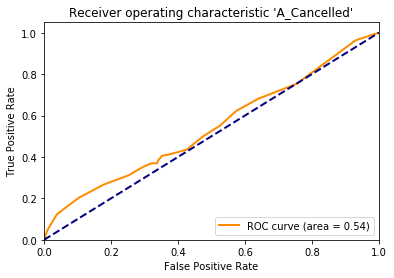

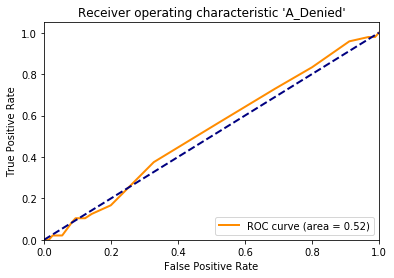

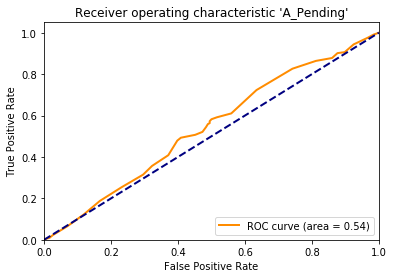

In [25]:
import sklearn.metrics as met
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
th=dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i],th[i] = met.roc_curve(actual[actual.columns.values[i+1]],preds[preds.columns.values[i+1]])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.figure()
    lw = i
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic %r' %actual.columns.values[i+1])
    plt.legend(loc="lower right")
    plt.show()

In [414]:
preds

,Case ID,A_Cancelled,A_Denied,A_Pending
0,Application_299986859,0.57,0.00,0.43
1,Application_481210204,0.18,0.14,0.68
2,Application_1231200933,0.08,0.09,0.83
3,Application_294573356,0.24,0.03,0.73
4,Application_1968368712,0.12,0.37,0.51
5,Application_2010505878,0.55,0.16,0.29
6,Application_923406445,0.27,0.11,0.62
7,Application_561722327,0.13,0.26,0.61
8,Application_555108256,0.00,0.25,0.75
9,Application_1567894569,0.17,0.34,0.49


In [415]:
actual

,Case ID,A_Cancelled,A_Denied,A_Pending
0,Application_299986859,0,0,1
1,Application_481210204,1,0,0
2,Application_1231200933,1,0,0
3,Application_294573356,0,1,0
4,Application_1968368712,0,1,0
5,Application_2010505878,1,0,0
6,Application_923406445,1,0,0
7,Application_561722327,0,1,0
8,Application_555108256,0,0,1
9,Application_1567894569,1,0,0
